In [1]:
#1
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2
df=pd.read_csv("Week7_train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [41]:
#4.
df.shape

(42000, 785)

In [42]:
#5.
from sklearn.model_selection import train_test_split
# Select 10% of the data
df_sample,y= train_test_split(df, test_size=0.9, random_state=42)

print(df_sample.shape)  # Check the size of the sample


(4200, 785)


In [43]:
#6.
df_sample.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9867,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27923,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41720,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35503,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21372,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#7.
num_classes = df["label"].nunique()  # Replace "target" with your actual label column name
unique_classes = df["label"].unique()
print(unique_classes )

[1 0 4 7 3 5 8 9 2 6]


In [45]:
#8.

In [47]:
#9.
x=df.iloc[:,1]
y=df.iloc[:,0]
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

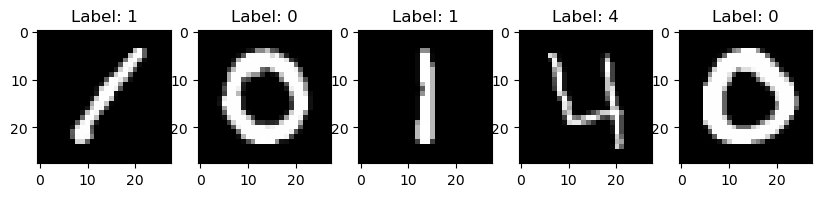

In [26]:
#10.
def plot_images(X, y, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")  # Reshape based on image size
        ax.set_title(f"Label: {y.iloc[i]}")
        #ax.axis("off")
    plt.show()

plot_images(x, y)


In [27]:
#11.
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)


In [28]:
#12,13.
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)  # Default parameters
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
#14.
y_pred=knn.predict(X_val)
print(y_pred)

[8 1 9 ... 7 4 4]


In [34]:
#15.
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_val ,y_pred)
conf

array([[1022,    0,    0,    0,    0,    0,    3,    0,    0,    0],
       [   0, 1143,    0,    0,    0,    0,    3,    0,    0,    0],
       [   9,   17, 1014,    3,    2,    2,    2,   22,    1,    0],
       [   2,    5,    4, 1110,    0,   10,    2,    6,    5,    7],
       [   2,    7,    0,    0,  993,    0,    3,    1,    0,   18],
       [   2,    2,    0,   19,    1,  861,    9,    0,    1,    3],
       [   8,    2,    0,    0,    0,    2,  997,    0,    1,    0],
       [   0,   26,    2,    0,    2,    0,    0, 1088,    0,   17],
       [   1,   14,    2,   18,    3,   18,    4,    1,  936,    8],
       [   6,    3,    1,   12,   10,    0,    0,   14,    2,  986]])

In [35]:
#16.
# Printing classification report
from sklearn.metrics import classification_report, accuracy_score
# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# calssification_report
classification = classification_report(y_val , y_pred)
print(classification)

Accuracy: 0.9667
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1025
           1       0.94      1.00      0.97      1146
           2       0.99      0.95      0.97      1072
           3       0.96      0.96      0.96      1151
           4       0.98      0.97      0.98      1024
           5       0.96      0.96      0.96       898
           6       0.97      0.99      0.98      1010
           7       0.96      0.96      0.96      1135
           8       0.99      0.93      0.96      1005
           9       0.95      0.95      0.95      1034

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



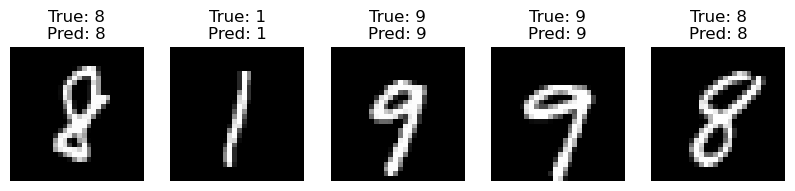

In [36]:
#17
def plot_predicted_images(X, y_true, y_pred, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")  # Reshape if needed
        ax.set_title(f"True: {y_true.iloc[i]}\nPred: {y_pred[i]}")
        ax.axis("off")
    plt.show()

plot_predicted_images(X_val, y_val, y_pred)
